# Maximiliano Villegas Garcia A01635825

# Activity: work with the iris dataset

3. Do clustering with the iris flower dataset to form clusters using as features sepal and petal width and length. Notice that scatter plots here are not possible


4. For the previous cases: 
    - With and without using min max scaling: determine whether the scaling benefits or not
    - Compute and show the elbow plot


5. Draw conclusions:
    - About the scalling: does it help or not?
    - About the elbow plot: does the K agree with the real number of clusters?
    - Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?

In [39]:
# Import the packages that we will be using
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

In [40]:
# url string that hosts our .csv file
url = "datasets/iris/iris.csv"

# Read the .csv file and store it as a pandas Data Frame
ds = pd.read_csv(url)

In [41]:
ds

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [42]:
# Encoding the categorical column
ds = ds.replace({"Class":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
ds

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [43]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(ds[['PetalLength','PetalWidth','SepalLength', 'SepalWidth']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [44]:
# Add a new column to the dataset with the cluster information
ds['Cluster1'] = yp

ds

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,Cluster1
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


In [45]:
ds.Cluster1.unique()

array([1, 2, 0], dtype=int32)

In [46]:
km.cluster_centers_

array([[5.74210526, 2.07105263, 6.85      , 3.07368421],
       [1.462     , 0.246     , 5.006     , 3.428     ],
       [4.39354839, 1.43387097, 5.9016129 , 2.7483871 ]])

In [47]:
km.inertia_

78.851441426146

In [48]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(ds[['PetalLength','PetalWidth','SepalLength', 'SepalWidth']])
    sse.append(km.inertia_)

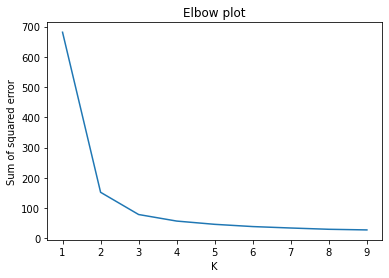

In [49]:
plt.plot(k_rng,sse)
plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(ds[['PetalLength']])
ds['PetalLength'] = scaler.transform(ds[['PetalLength']])

scaler.fit(ds[['PetalWidth']])
ds['PetalWidth'] = scaler.transform(ds[['PetalWidth']])

scaler.fit(ds[['SepalLength']])
ds['SepalLength'] = scaler.transform(ds[['SepalLength']])

scaler.fit(ds[['SepalWidth']])
ds['SepalWidth'] = scaler.transform(ds[['SepalWidth']])

ds

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,Cluster1
0,0.222222,0.625000,0.067797,0.041667,0,1
1,0.166667,0.416667,0.067797,0.041667,0,1
2,0.111111,0.500000,0.050847,0.041667,0,1
3,0.083333,0.458333,0.084746,0.041667,0,1
4,0.194444,0.666667,0.067797,0.041667,0,1
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,0
146,0.555556,0.208333,0.677966,0.750000,2,2
147,0.611111,0.416667,0.711864,0.791667,2,0
148,0.527778,0.583333,0.745763,0.916667,2,0


In [51]:
ds.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,Cluster1
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056,1.000000,1.160000
std,0.230018,0.181611,0.299203,0.317599,0.819232,0.803349
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000,0.250000
50%,0.416667,0.416667,0.567797,0.500000,1.000000,1.000000
75%,0.583333,0.541667,0.694915,0.708333,2.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000


In [52]:
# Initialize model and define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(ds[['PetalLength','PetalWidth','SepalLength', 'SepalWidth']])

# Print estimated cluster of each point in the dataser
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [53]:
ds['Cluster2'] = yp

ds

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class,Cluster1,Cluster2
0,0.222222,0.625000,0.067797,0.041667,0,1,1
1,0.166667,0.416667,0.067797,0.041667,0,1,1
2,0.111111,0.500000,0.050847,0.041667,0,1,1
3,0.083333,0.458333,0.084746,0.041667,0,1,1
4,0.194444,0.666667,0.067797,0.041667,0,1,1
...,...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,0,0
146,0.555556,0.208333,0.677966,0.750000,2,2,2
147,0.611111,0.416667,0.711864,0.791667,2,0,0
148,0.527778,0.583333,0.745763,0.916667,2,0,0


In [54]:
km.cluster_centers_

array([[0.79704476, 0.82478632, 0.70726496, 0.4508547 ],
       [0.07830508, 0.06083333, 0.19611111, 0.595     ],
       [0.57571548, 0.54918033, 0.44125683, 0.30737705]])

# 4.With and without using min max scaling: determine whether the scaling benefits or not

Si se benefician ya que podemos hacer una mejor apreciacion de los datos. Pasa que los datos pueden coincidir en algunas ocasiones lo que afecta visualizacion y por ende el analisis. Ademas obtenemos un modelo basado en minimos y maximos lo cual puede resultar util en algunos casos.

# 5. Draw conclusions:

- About the scalling: does it help or not?

Al utilizar el escalado mejora la manera en la que se despliegan los datos, por lo que tambien puede mejorar su analisis e interpretacion.


- About the elbow plot: does the K agree with the real number of clusters?

Si, tenemos tres tipos de flores y tres clusters en el punto de inflexion.


- Comparison between (i) sepal features alone, (ii) petal features alone, and (ii) both sepal with petal features: which one is better/worse? Why?

Pienso que es mejor analizar los datos por su cuenta. Debido a que el resultado es mas limpio y ordenado, se pueden observar con mayor precision los datos por su cuenta. Utilizando todos los datos a la vez, tambien pierdes la oportunidad ciertos analisis estadisticos que pueden ser muy utiles para la investigacion.